In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics

In [36]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

In [16]:
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])

In [17]:
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])

In [18]:
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

In [19]:
p1 = pd.DataFrame({'x': x1, 'y': y1})
p2 = pd.DataFrame({'x': x2, 'y': y2})
p3 = pd.DataFrame({'x': x3, 'y': y3})
p4 = pd.DataFrame({'x': x4, 'y': y4})

In [20]:
p1.to_csv('data/anscombe-1.csv')
p2.to_csv('data/anscombe-2.csv')
p3.to_csv('data/anscombe-3.csv')
p4.to_csv('data/anscombe-4.csv')

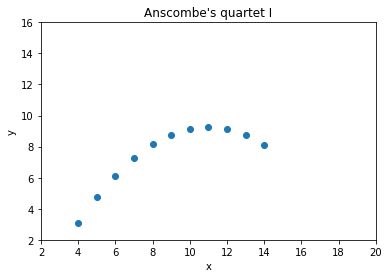

In [21]:
plt.scatter(x1, y2)
plt.xlim((2, 20))
plt.ylim((2, 16))
plt.title('Anscombe\'s quartet I')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<Figure size 432x288 with 0 Axes>

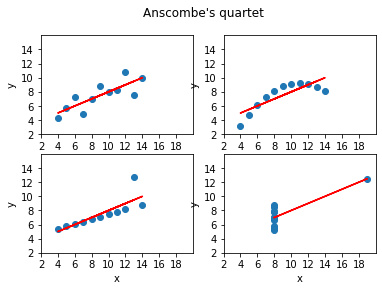

In [76]:
reg = linear_model.LinearRegression()
fig = plt.figure()
fig, ax = plt.subplots(2, 2)
[[tl, tr], [bl, br]] = ax
for i, p in enumerate([tl, tr, bl, br]) :
    p.set_xticks(np.arange(2, 20, 2))
    p.set_yticks(np.arange(2, 16, 2))
    p.set_xlabel('x')
    p.set_ylabel('y')

tl.scatter(x1, y1)
reg.fit(x1[:, np.newaxis], y1)
y1_p = reg.predict(x1[:, np.newaxis])
tl.plot(x1, y1_p, color='red')

tr.scatter(x2, y2)
reg.fit(x2[:, np.newaxis], y2)
y2_p = reg.predict(x2[:, np.newaxis])
tr.plot(x2, y2_p, color='red')

bl.scatter(x3, y3)
reg.fit(x3[:, np.newaxis], y3)
y3_p = reg.predict(x3[:, np.newaxis])
bl.plot(x3, y3_p, color='red')

br.scatter(x4, y4)
reg.fit(x4[:, np.newaxis], y4)
y4_p = reg.predict(x4[:, np.newaxis])
br.plot(x4, y4_p, color='red')

plt.suptitle('Anscombe\'s quartet')
plt.setp(ax, xlim=[2, 20], ylim=[2, 16])
plt.show()

mean
x    9.000000
y    7.500909
dtype: float64
x    9.000000
y    7.500909
dtype: float64
x    9.0
y    7.5
dtype: float64
x    9.000000
y    7.500909
dtype: float64
variance
x    11.000000
y     4.127269
dtype: float64
x    11.000000
y     4.127629
dtype: float64
x    11.00000
y     4.12262
dtype: float64
x    11.000000
y     4.123249
dtype: float64
correlation
          x         y
x  1.000000  0.816421
y  0.816421  1.000000
          x         y
x  1.000000  0.816237
y  0.816237  1.000000
          x         y
x  1.000000  0.816287
y  0.816287  1.000000
          x         y
x  1.000000  0.816521
y  0.816521  1.000000


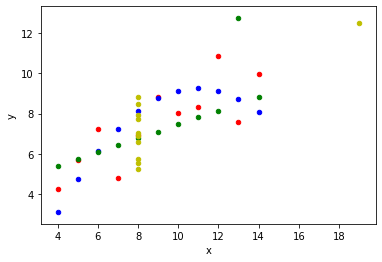

In [64]:
ax = p1.plot.scatter(x='x', y='y', color='r')
p2.plot.scatter(x='x', y='y', color='b', ax=ax)
p3.plot.scatter(x='x', y='y', color='g', ax=ax)
p4.plot.scatter(x='x', y='y', color='y', ax=ax)
ps = [p1, p2, p3, p4]
print('mean')
for mean in [p.mean() for p in ps]:
    print(mean)
print('variance')
for var in [p.var() for p in ps]:
    print(var)
print('correlation')
for corr in [p.corr() for p in ps]:
    print(corr)

In [48]:
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
print(reg.coef_)
print(reg.intercept_)

[0.5 0.5]
1.1102230246251565e-16


In [66]:
reg = linear_model.LinearRegression()
for x, y in [(x1, y1), (x2, y2), (x3, y3), (x4, y4)] :
    reg.fit(x[:, np.newaxis], y)
    y_pred = reg.predict(x[:, np.newaxis])
    r2 = metrics.r2_score(y, y_pred)
    print(f'coefficient: {reg.coef_[0]}, intercept: {reg.intercept_}, r2: {r2}')

coefficient: 0.5000909090909093, intercept: 3.0000909090909094, r2: 0.6665424595087748
coefficient: 0.5000000000000001, intercept: 3.000909090909089, r2: 0.6662420337274844
coefficient: 0.4997272727272728, intercept: 3.002454545454545, r2: 0.6663240410665592
coefficient: 0.49990909090909097, intercept: 3.0017272727272726, r2: 0.6667072568984653
